## 1. Import Libraries & Load Data


In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [175]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [176]:
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [178]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In [179]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

## 2. Standardize Column Names

In [180]:
df.columns = df.columns.str.lower().str.replace(" ", "_")


In [181]:
df.head()

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## 3. Clean Data Types

>Some columns may be stored as strings but should be numeric:

In [182]:
# Convert columns to numbers (ignore errors)
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['sleep_duration'] = pd.to_numeric(df['sleep_duration'], errors='coerce')
df['quality_of_sleep'] = pd.to_numeric(df['quality_of_sleep'], errors='coerce')
df['physical_activity_level'] = pd.to_numeric(df['physical_activity_level'], errors='coerce')
df['stress_level'] = pd.to_numeric(df['stress_level'], errors='coerce')


>Fill null disorder values with No Disorder

In [183]:
df["sleep_disorder"].fillna('None', inplace=True)
df["sleep_disorder"].value_counts()

/var/folders/8m/rfsmltyn01b1h7rd54xtgnvw0000gn/T/ipykernel_22016/3666868065.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sleep_disorder"].fillna('None', inplace=True)


sleep_disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

>Split the blood pressure into two types

In [184]:
df[['systolic_blood_pressure', 'diastolic_blood_pressure']] = df['blood_pressure'].str.split('/', expand=True)

# Turn them into numbers
df['systolic_blood_pressure'] = pd.to_numeric(df['systolic_blood_pressure'], errors='coerce')
df['diastolic_blood_pressure'] = pd.to_numeric(df['diastolic_blood_pressure'], errors='coerce')

>Clean BMI Categories

In [185]:
df['bmi_category'] = df['bmi_category'].replace("Normal Weight", "Normal")

## 4.Save Cleaned Data

In [186]:
df.to_csv("cleaned_sleep_health.csv", index=False)

## 5. Create a folder for data figures

In [187]:
os.makedirs("figures", exist_ok=True)

## 6. Data visualizing

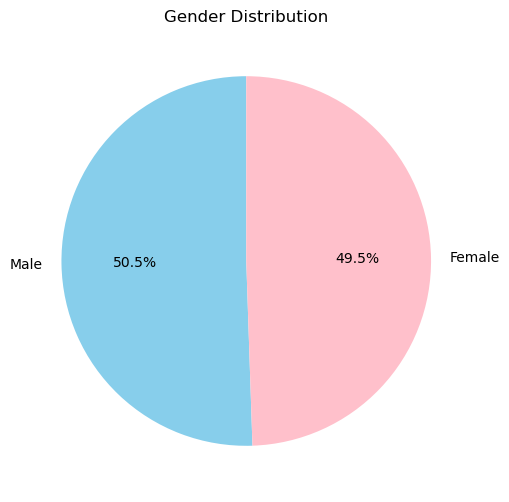

In [188]:
gender_counts = df["gender"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue','pink'])
plt.title("Gender Distribution")
plt.savefig("figures/gender_count_dist.png",dpi=300)
plt.show()

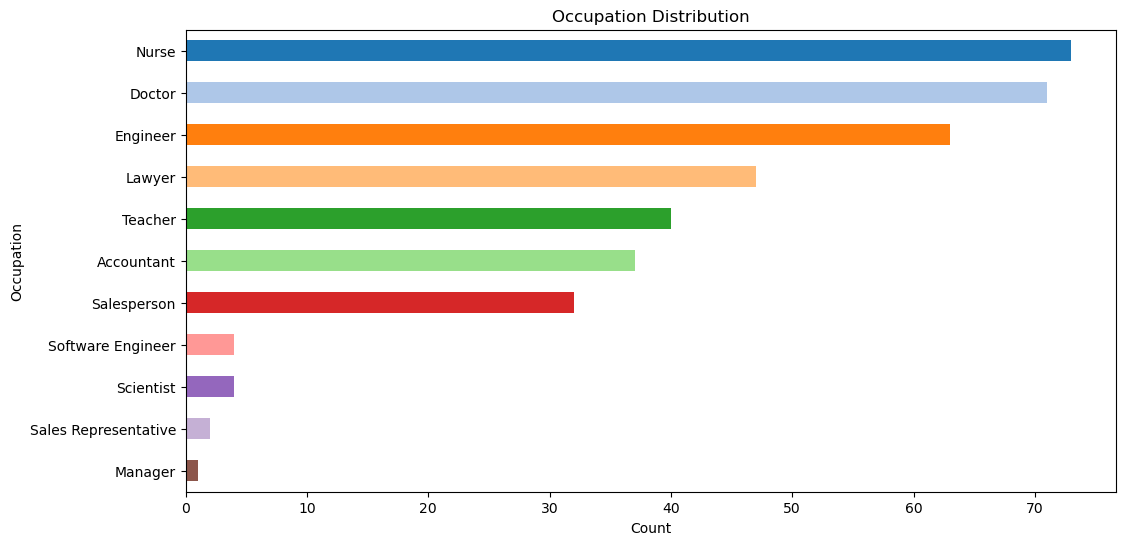

In [189]:
occupation_counts = df['occupation'].value_counts()

# Pick a colormap so each bar has a unique color
colors = plt.cm.tab20.colors[:len(occupation_counts)]  # up to 20 distinct colors

occupation_counts = df['occupation'].value_counts()

# Pick a colormap so each bar has a unique color
colors = plt.cm.tab20.colors[:len(occupation_counts)]  # up to 20 distinct colors

plt.figure(figsize=(12,6))
occupation_counts.plot(kind='barh', color=colors)

plt.title("Occupation Distribution")
plt.xlabel("Count")
plt.ylabel("Occupation")
plt.gca().invert_yaxis()  # largest on top
plt.savefig("figures/occupation_dist.png",dpi=300, bbox_inches='tight')
plt.show()

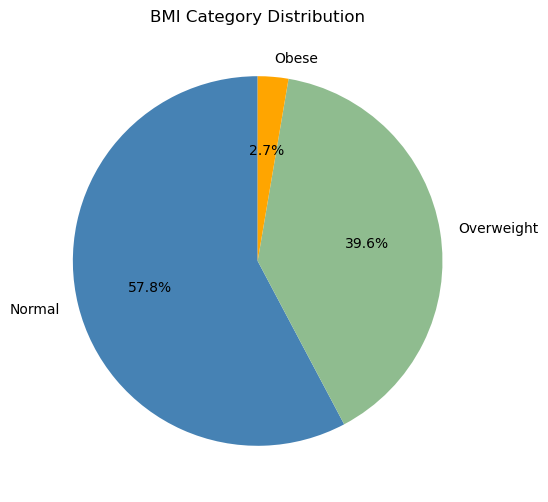

In [190]:
bmi_counts = df['bmi_category'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=90, colors=["steelblue", "darkseagreen", "orange"])
plt.title("BMI Category Distribution")
plt.savefig("figures/bmi_dist.png",dpi=300)
plt.show()

### Overall Sleep Duration distribution

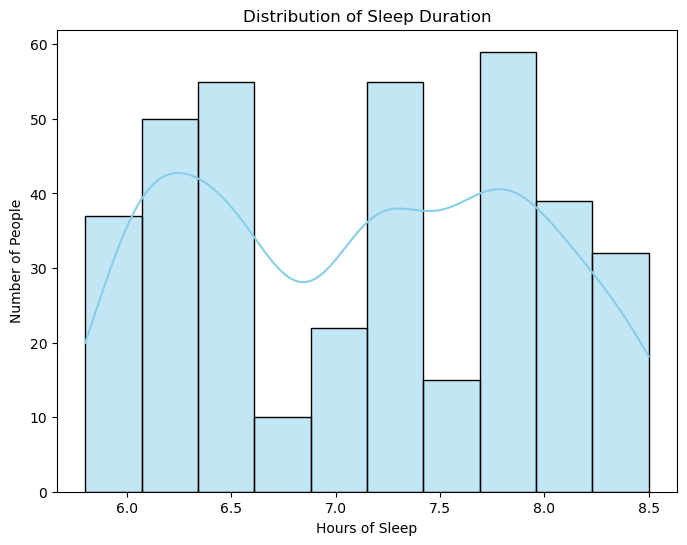

In [191]:
plt.figure(figsize=(8,6))
sns.histplot(df['sleep_duration'], bins=10, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution of Sleep Duration")
plt.xlabel("Hours of Sleep")
plt.ylabel("Number of People")
plt.savefig("figures/leep_duration_dist.png",dpi=300)
plt.show()

### Gender vs Sleep Duration

/var/folders/8m/rfsmltyn01b1h7rd54xtgnvw0000gn/T/ipykernel_22016/1269045149.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='sleep_duration', data=df, palette=colors, order= gender_order)


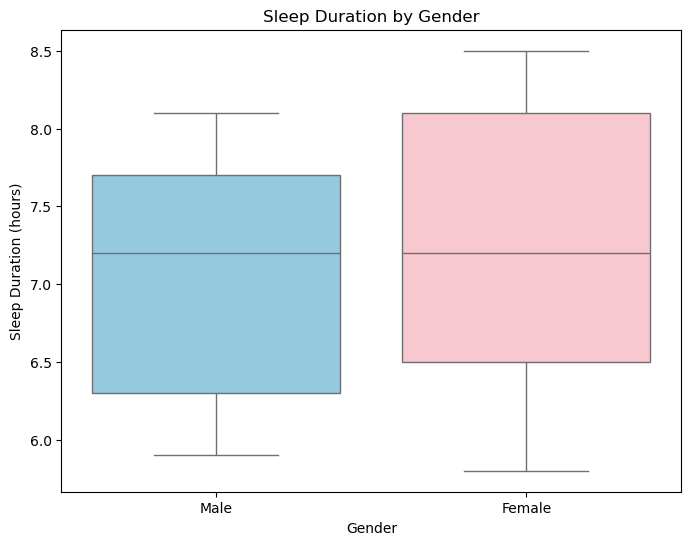

In [192]:
# Boxplot for Sleep Duration by Gender

gender_order = ["Male","Female"]
colors = ["skyblue", "pink"]
plt.figure(figsize=(8,6))
sns.boxplot(x='gender', y='sleep_duration', data=df, palette=colors, order= gender_order)
plt.title('Sleep Duration by Gender')
plt.ylabel('Sleep Duration (hours)')
plt.xlabel('Gender')
plt.savefig("figures/sleep_duration_genders.png",dpi=300)
plt.show()



/var/folders/8m/rfsmltyn01b1h7rd54xtgnvw0000gn/T/ipykernel_22016/3025018002.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="gender", y="sleep_duration", data=df, palette=colors, estimator="mean")


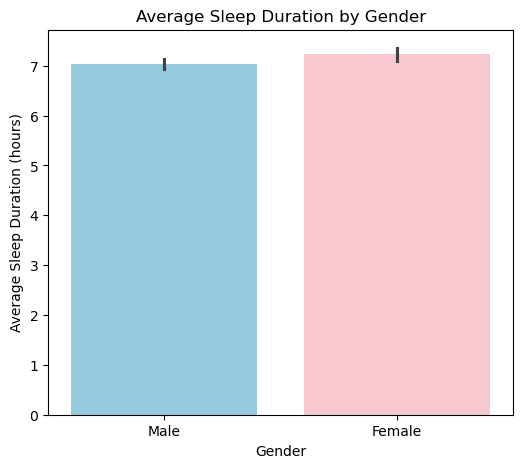

In [193]:
gender_order = ["Male","Female"]
colors = ["skyblue", "pink"]  
plt.figure(figsize=(6,5))
sns.barplot(x="gender", y="sleep_duration", data=df, palette=colors, estimator="mean")
plt.title("Average Sleep Duration by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Sleep Duration (hours)")
plt.savefig("figures/avg_sleep_duration_genders.png",dpi=300)
plt.show()

### Average Sleep Duration by Occupation

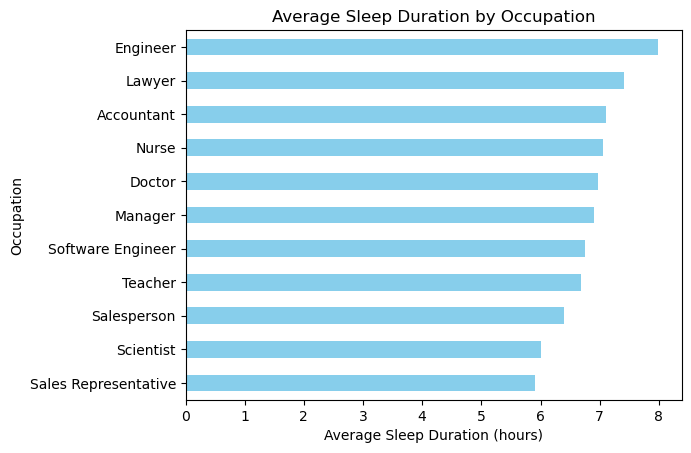

In [194]:
avg_sleep_occ = df.groupby("occupation")["sleep_duration"].mean().sort_values()


# Plot horizontal bar chart
avg_sleep_occ.plot(kind="barh", color="skyblue")

plt.title("Average Sleep Duration by Occupation")
plt.xlabel("Average Sleep Duration (hours)")
plt.ylabel("Occupation")
plt.savefig("figures/avg_sleep_duration_occupations.png",dpi=300,bbox_inches='tight')
plt.show()

### Bar Chart: Average Sleep Duration by BMI Category

/var/folders/8m/rfsmltyn01b1h7rd54xtgnvw0000gn/T/ipykernel_22016/822610767.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="bmi_category", y="sleep_duration", data=df, palette="Set3", estimator="mean", order=bmi_order)


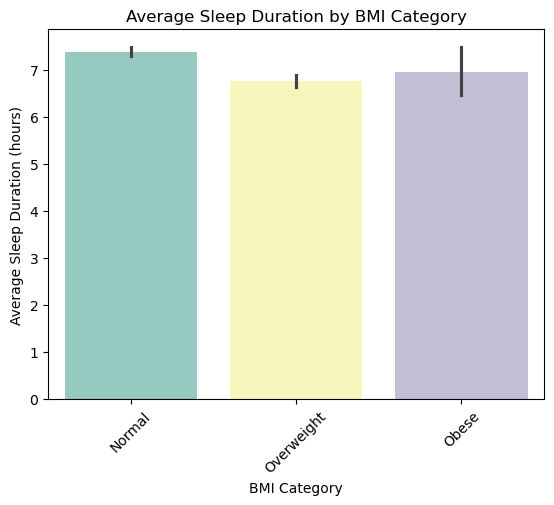

In [195]:
# Average sleep by BMI
avg_sleep_bmi = df.groupby("bmi_category")["sleep_duration"].mean()
bmi_order = ["Normal", "Overweight", "Obese"]

# Plot
sns.barplot(x="bmi_category", y="sleep_duration", data=df, palette="Set3", estimator="mean", order=bmi_order)

plt.title("Average Sleep Duration by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Average Sleep Duration (hours)")
plt.xticks(rotation=45)
plt.savefig("figures/avg_sleep_duration_bmi.png",dpi=300)
plt.show()

### Boxplot: Sleep Duration by BMI Category

/var/folders/8m/rfsmltyn01b1h7rd54xtgnvw0000gn/T/ipykernel_22016/3885896414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bmi_category", y="sleep_duration", data=df, palette="Set3",order=bmi_order)


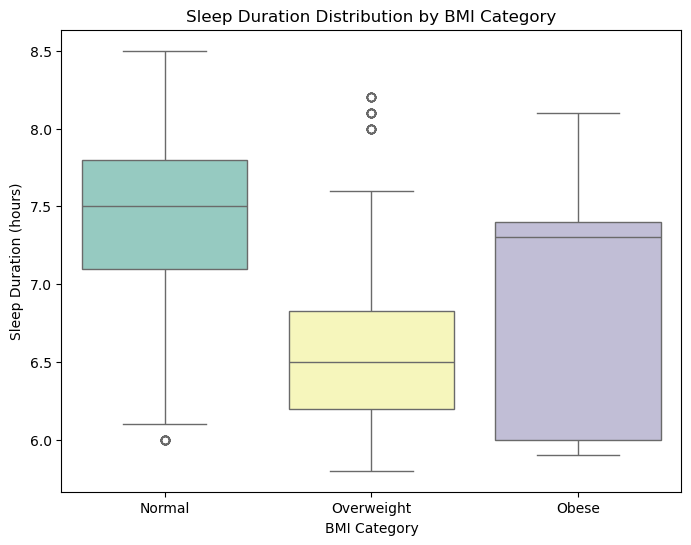

In [196]:
plt.figure(figsize=(8,6))
bmi_order = ["Normal", "Overweight", "Obese"]
sns.boxplot(x="bmi_category", y="sleep_duration", data=df, palette="Set3",order=bmi_order)
plt.title("Sleep Duration Distribution by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Sleep Duration (hours)")
plt.savefig("figures/sleep_duration_dist_bmi.png",dpi=300)
plt.show()

/var/folders/8m/rfsmltyn01b1h7rd54xtgnvw0000gn/T/ipykernel_22016/2209728865.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


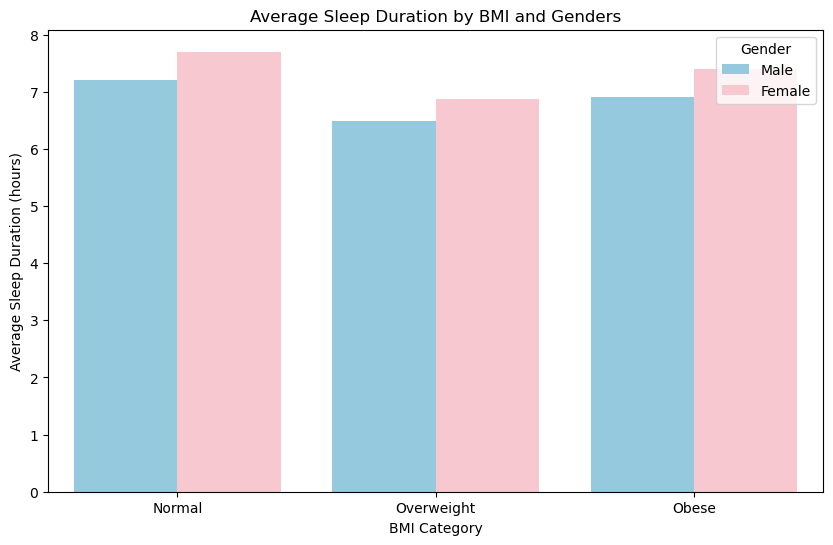

In [253]:
plt.figure(figsize=(10,6))
bmi_order = ["Normal", "Overweight", "Obese"]
sns.barplot(
    x="bmi_category", 
    y="sleep_duration", 
    hue="gender",        # separate by gender
    data=df,
    order=bmi_order,
    ci=None,             # remove error bars for simplicity
    palette=["skyblue", "pink"]  # color palette for genders
)

plt.title("Average Sleep Duration by BMI and Genders")
plt.xlabel("BMI Category")
plt.ylabel("Average Sleep Duration (hours)")
plt.legend(title="Gender")
plt.savefig("figures/avg_sleep_duration_bmi_genders.png",dpi=300)
plt.show()

### Bar Chart: Average Sleep Duration by Sleep Disorder

/var/folders/8m/rfsmltyn01b1h7rd54xtgnvw0000gn/T/ipykernel_22016/1074686590.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sleep_disorder", y="sleep_duration", data=df, palette="Set2", estimator="mean", order=disorder_order)


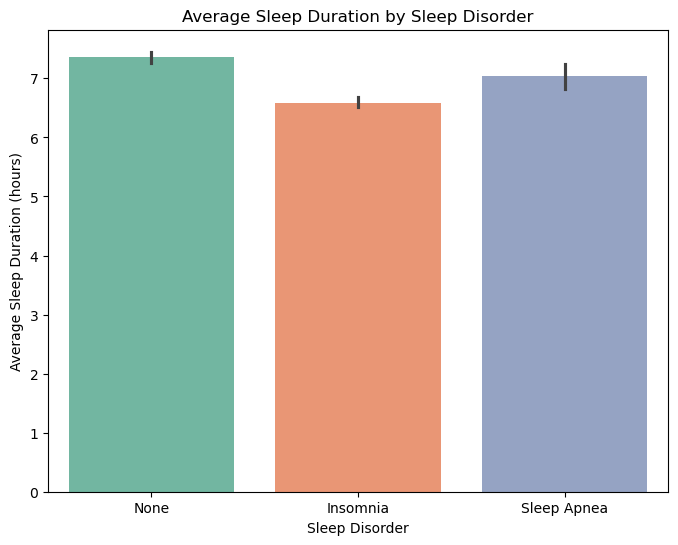

In [198]:
disorder_order = ["None", "Insomnia", "Sleep Apnea"]
plt.figure(figsize=(8,6))
sns.barplot(x="sleep_disorder", y="sleep_duration", data=df, palette="Set2", estimator="mean", order=disorder_order)
plt.title("Average Sleep Duration by Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Average Sleep Duration (hours)")
plt.savefig("figures/avg_sleep_duration_disorder.png",dpi=300)
plt.show()

### Scatter Plot: Age vs Sleep Duration

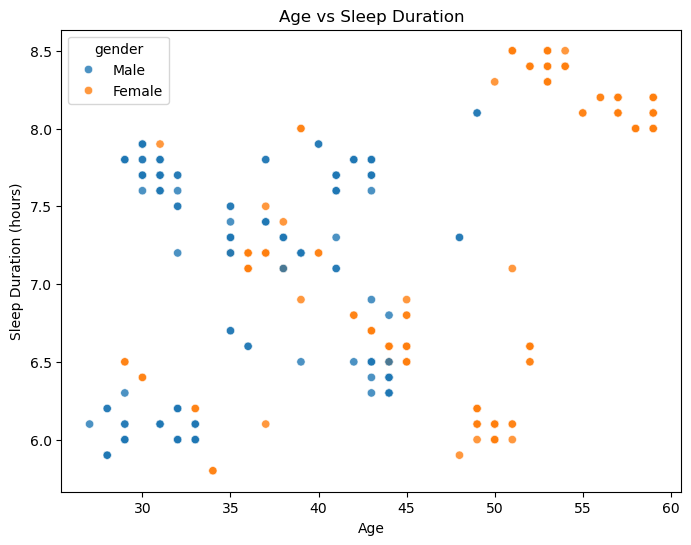

In [199]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="age", y="sleep_duration", data=df, hue="gender", alpha=0.8)
plt.title("Age vs Sleep Duration")
plt.xlabel("Age")
plt.ylabel("Sleep Duration (hours)")
plt.savefig("figures/age_sleep_duration.png",dpi=300)
plt.show()

### Scatter Plot: Physical Activity vs Sleep Duration

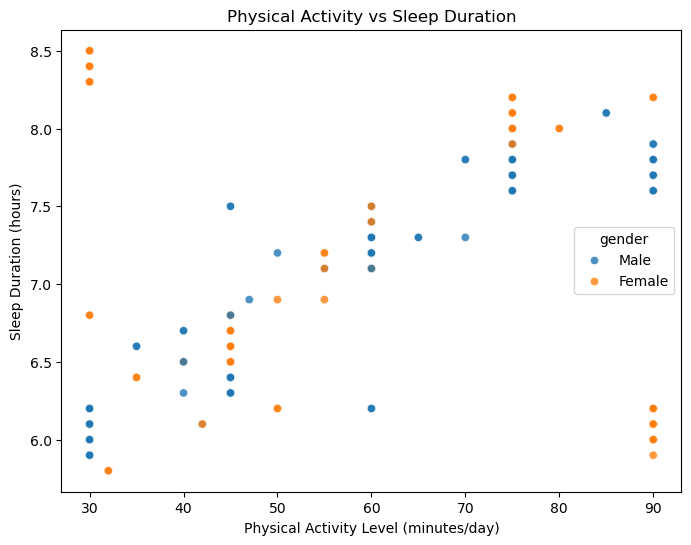

In [200]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="physical_activity_level", y="sleep_duration", data=df, hue="gender", alpha=0.8)
plt.title("Physical Activity vs Sleep Duration")
plt.xlabel("Physical Activity Level (minutes/day)")
plt.ylabel("Sleep Duration (hours)")
plt.savefig("figures/physical_activity_sleep_duration.png",dpi=300)
plt.show()

### Scatter Plot: Stress Level vs Sleep Duration

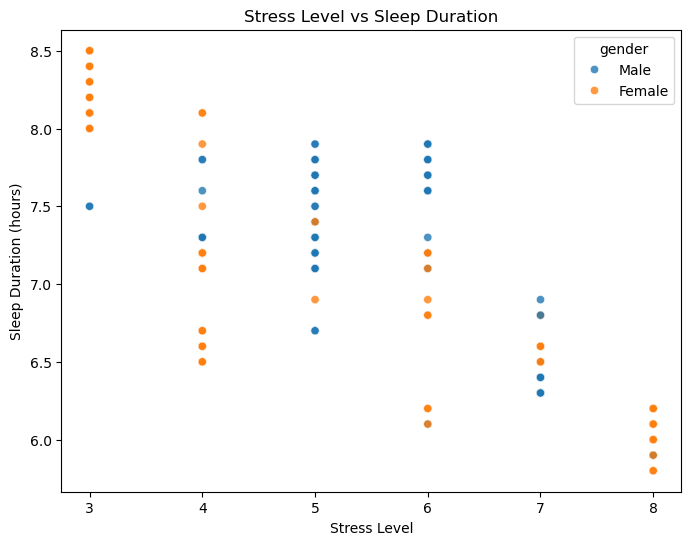

In [201]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="stress_level", y="sleep_duration", data=df, hue="gender", alpha=0.8)
plt.title("Stress Level vs Sleep Duration")
plt.xlabel("Stress Level")
plt.ylabel("Sleep Duration (hours)")
plt.savefig("figures/stress_level_sleep_duration.png",dpi=300)
plt.show()

### Correlation Heatmap

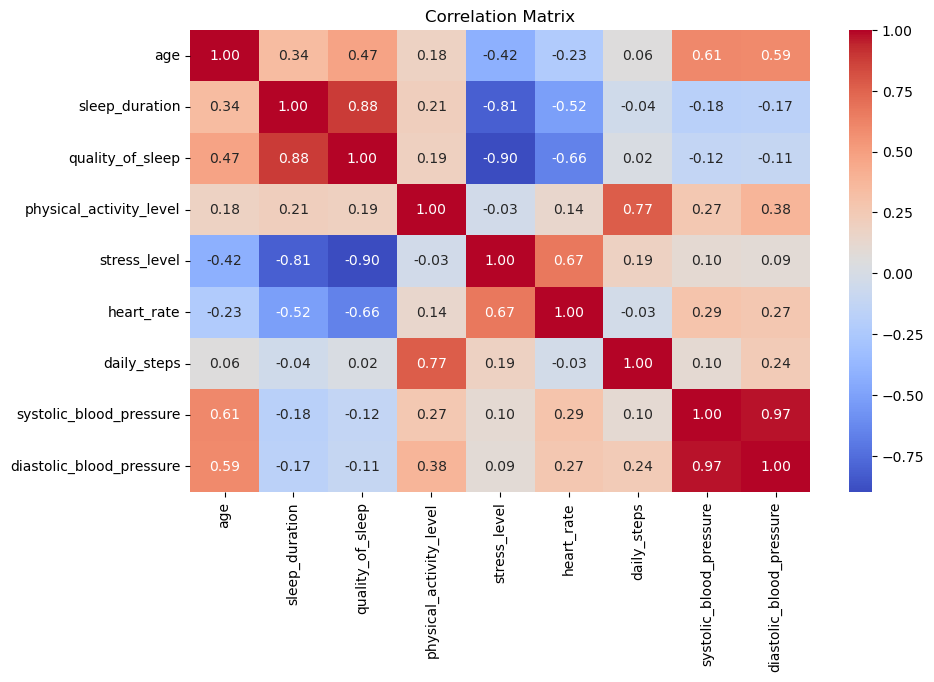

In [249]:
plt.figure(figsize=(10,6))

# Drop Personal ID if it exists
corr_data = df.drop(columns=["person_id"], errors="ignore")

# Compute correlation only on numeric columns
sns.heatmap(corr_data.corr(numeric_only=True), 
            annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Matrix")
plt.savefig("figures/correlation_matrix_heatmap.png",dpi=300, bbox_inches='tight')
plt.show()

### Distribution of Quality of Sleep

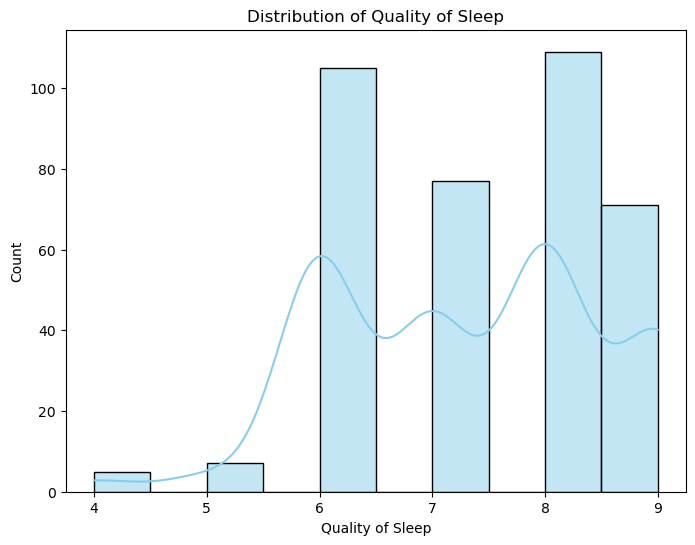

In [203]:
plt.figure(figsize=(8,6))
sns.histplot(df["quality_of_sleep"], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Quality of Sleep")
plt.xlabel("Quality of Sleep")
plt.ylabel("Count")
plt.savefig("figures/sleep_quality_dist.png",dpi=300)
plt.show()

### Boxplot + Barplot (Average Quality by Gender) 

/var/folders/8m/rfsmltyn01b1h7rd54xtgnvw0000gn/T/ipykernel_22016/68609502.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="gender", y="quality_of_sleep", data=df, palette=colors, order= gender_order)


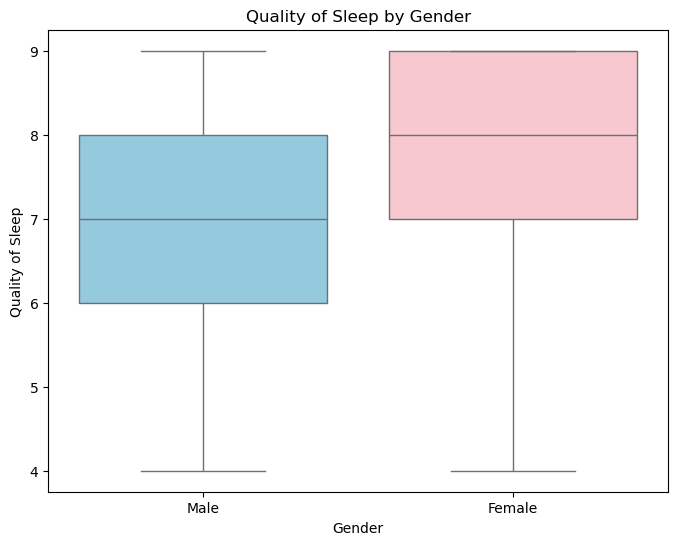

In [204]:
gender_order = ["Male","Female"]
colors = ["skyblue", "pink"]
plt.figure(figsize=(8,6))
sns.boxplot(x="gender", y="quality_of_sleep", data=df, palette=colors, order= gender_order)
plt.title("Quality of Sleep by Gender")
plt.xlabel("Gender")
plt.ylabel("Quality of Sleep")
plt.savefig("figures/sleep_quality_genders.png",dpi=300)
plt.show()





/var/folders/8m/rfsmltyn01b1h7rd54xtgnvw0000gn/T/ipykernel_22016/1853380857.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="gender", y="quality_of_sleep", data=df, palette=colors, estimator="mean", order=gender_order)


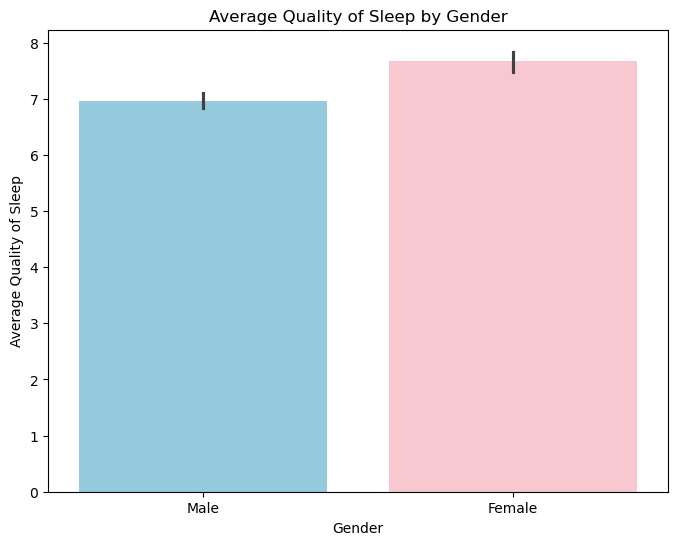

In [205]:
gender_order = ["Male","Female"]
colors = ["skyblue", "pink"]
plt.figure(figsize=(8,6))
sns.barplot(x="gender", y="quality_of_sleep", data=df, palette=colors, estimator="mean", order=gender_order)
plt.title("Average Quality of Sleep by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Quality of Sleep")
plt.savefig("figures/avg_sleep_quality_gender.png",dpi=300)
plt.show()

/var/folders/8m/rfsmltyn01b1h7rd54xtgnvw0000gn/T/ipykernel_22016/3381146512.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


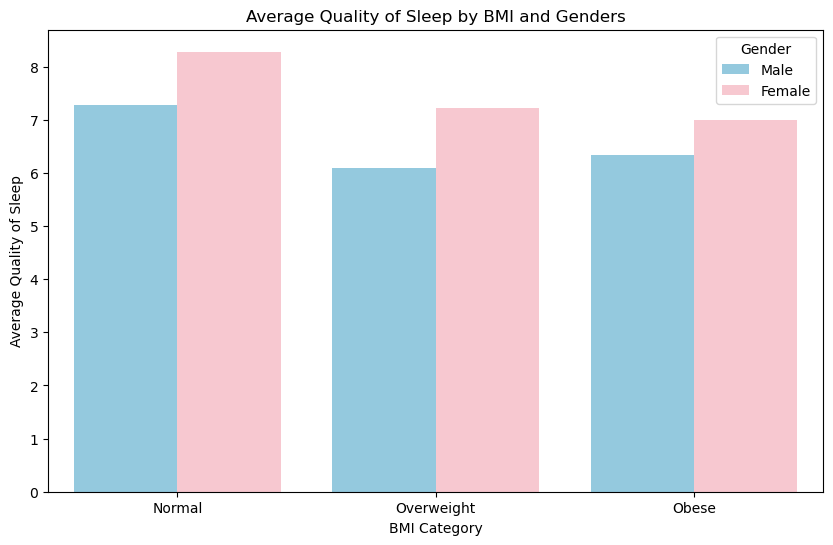

In [252]:
plt.figure(figsize=(10,6))
bmi_order = ["Normal", "Overweight", "Obese"]
sns.barplot(
    x="bmi_category", 
    y="quality_of_sleep", 
    hue="gender",        # separate by gender
    data=df,
    order= bmi_order,
    ci=None,             # remove error bars for simplicity
    palette=["skyblue", "pink"]  # color palette for genders
)

plt.title("Average Quality of Sleep by BMI and Genders")
plt.xlabel("BMI Category")
plt.ylabel("Average Quality of Sleep")
plt.legend(title="Gender")
plt.savefig("figures/avg_sleep_quality_bmi_genders.png",dpi=300)
plt.show()

### Average Quality of Sleep by Occupation

/var/folders/8m/rfsmltyn01b1h7rd54xtgnvw0000gn/T/ipykernel_22016/2355856826.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


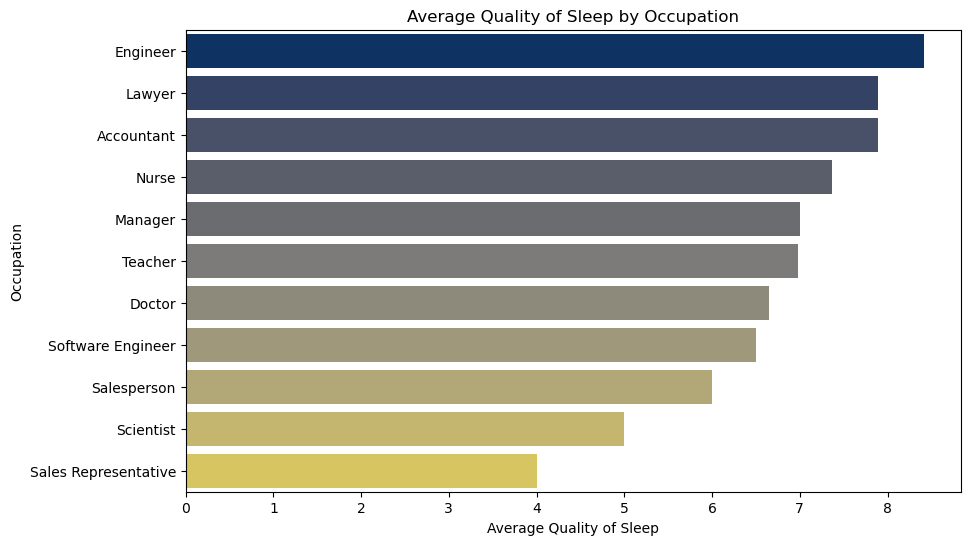

In [207]:
plt.figure(figsize=(10,6))
avg_quality_occ = df.groupby("occupation")["quality_of_sleep"].mean().sort_values(ascending=False)

sns.barplot(
    x=avg_quality_occ, 
    y=avg_quality_occ.index, 
    palette="cividis"
)

plt.title("Average Quality of Sleep by Occupation")
plt.xlabel("Average Quality of Sleep")
plt.ylabel("Occupation")
plt.savefig("figures/avg_sleep_quality_occupation.png",dpi=300, bbox_inches='tight')
plt.show()

### Boxplot + Barplot for BMI Category

/var/folders/8m/rfsmltyn01b1h7rd54xtgnvw0000gn/T/ipykernel_22016/2027154475.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bmi_category", y="quality_of_sleep", data=df, palette="Set2", order=bmi_order)


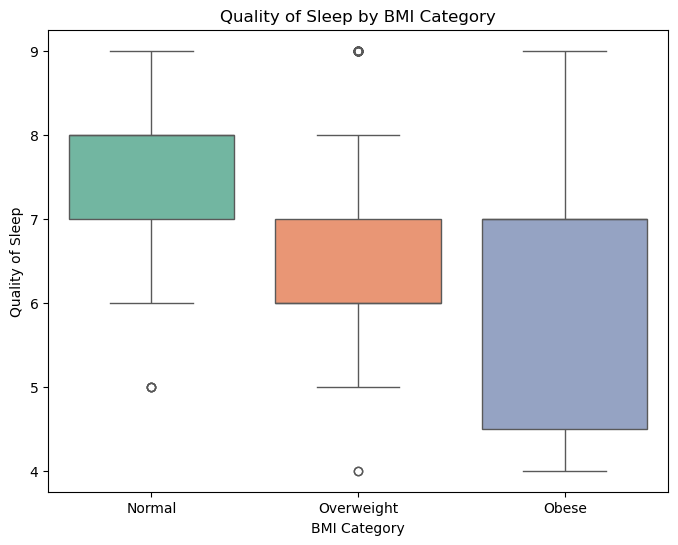

In [208]:
bmi_order = ["Normal", "Overweight", "Obese"]

# Boxplot with custom order
plt.figure(figsize=(8,6))
sns.boxplot(x="bmi_category", y="quality_of_sleep", data=df, palette="Set2", order=bmi_order)
plt.title("Quality of Sleep by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Quality of Sleep")
plt.savefig("figures/sleep_quality_bmi.png",dpi=300)
plt.show()

/var/folders/8m/rfsmltyn01b1h7rd54xtgnvw0000gn/T/ipykernel_22016/2856273685.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="bmi_category", y="quality_of_sleep", data=df, palette="Set2", estimator="mean", order=bmi_order)


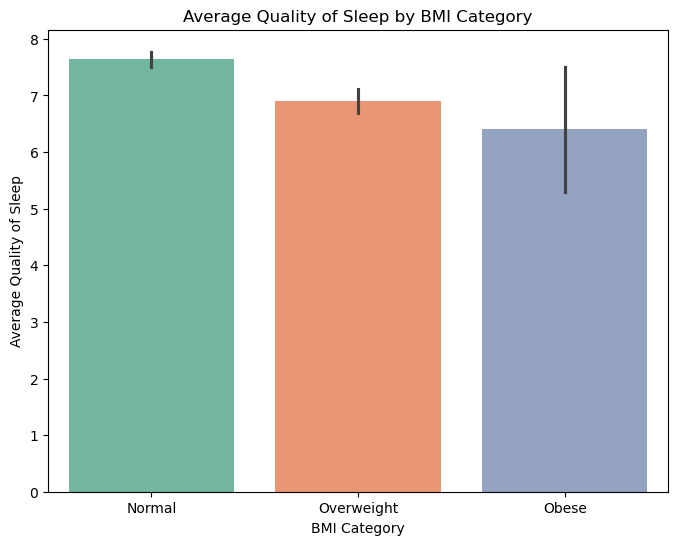

In [209]:
# Barplot (average quality by BMI Category)

plt.figure(figsize=(8,6))
sns.barplot(x="bmi_category", y="quality_of_sleep", data=df, palette="Set2", estimator="mean", order=bmi_order)
plt.title("Average Quality of Sleep by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Average Quality of Sleep")
plt.savefig("figures/avg_sleep_quality_bmi.png",dpi=300)
plt.show()

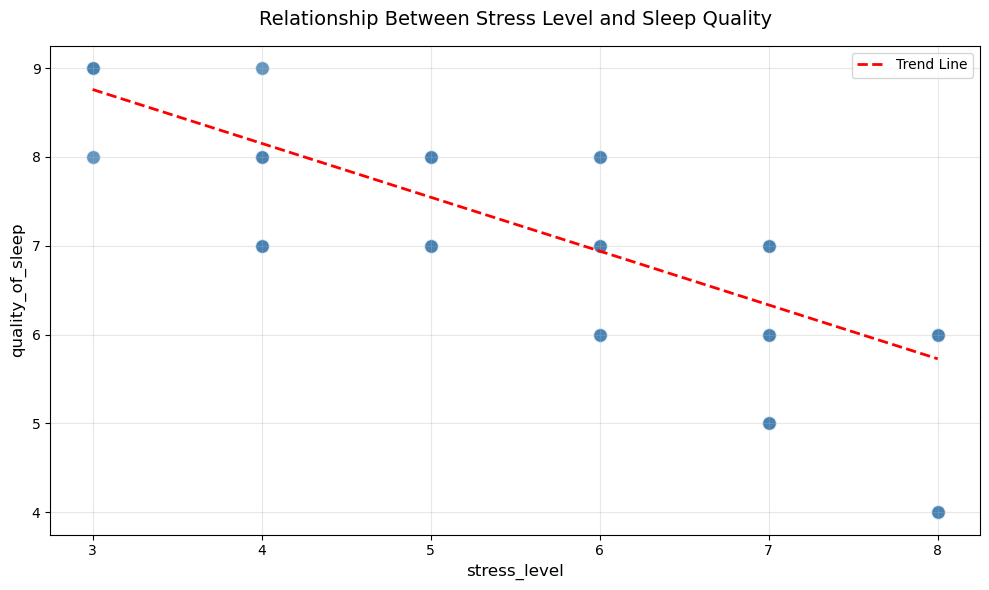

In [210]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
                x='stress_level', 
                y='quality_of_sleep', 
                alpha=0.6, 
                s=100,
                color='steelblue')

z = np.polyfit(df['stress_level'], df['quality_of_sleep'], 1)
p = np.poly1d(z)
plt.plot(df['stress_level'].sort_values(), 
         p(df['stress_level'].sort_values()), 
        "r--", 
         linewidth=2, 
         label='Trend Line')

plt.xlabel('stress_level', fontsize=12, fontweight='normal')
plt.ylabel('quality_of_sleep', fontsize=12, fontweight='normal')
plt.title('Relationship Between Stress Level and Sleep Quality', 
         fontsize=14, fontweight='normal', pad=15)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('figures/stress_vs_sleep_quality.png', dpi=300)
plt.show()

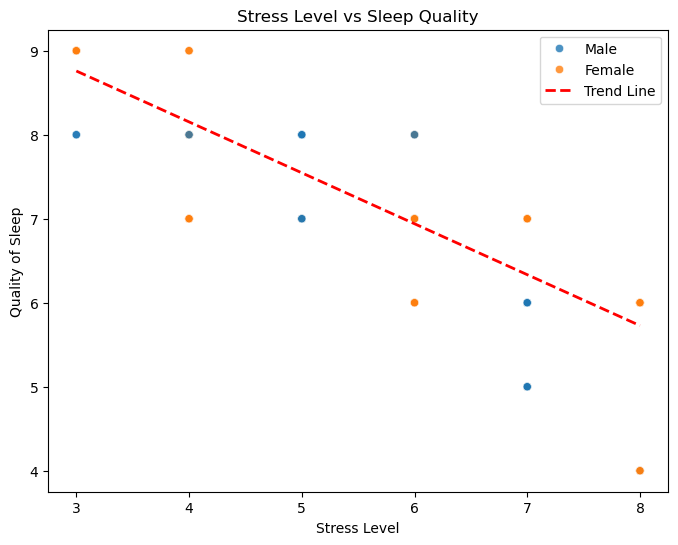

In [211]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="stress_level", y="quality_of_sleep", data=df, hue="gender", alpha=0.8)
z = np.polyfit(df['stress_level'], df['quality_of_sleep'], 1)
p = np.poly1d(z)
plt.plot(df['stress_level'].sort_values(), 
         p(df['stress_level'].sort_values()), 
        "r--", 
         linewidth=2, 
         label='Trend Line')
plt.legend()
plt.title("Stress Level vs Sleep Quality")
plt.xlabel("Stress Level")
plt.ylabel("Quality of Sleep")
plt.savefig("figures/stress_level_sleep_quality.png",dpi=300)
plt.show()

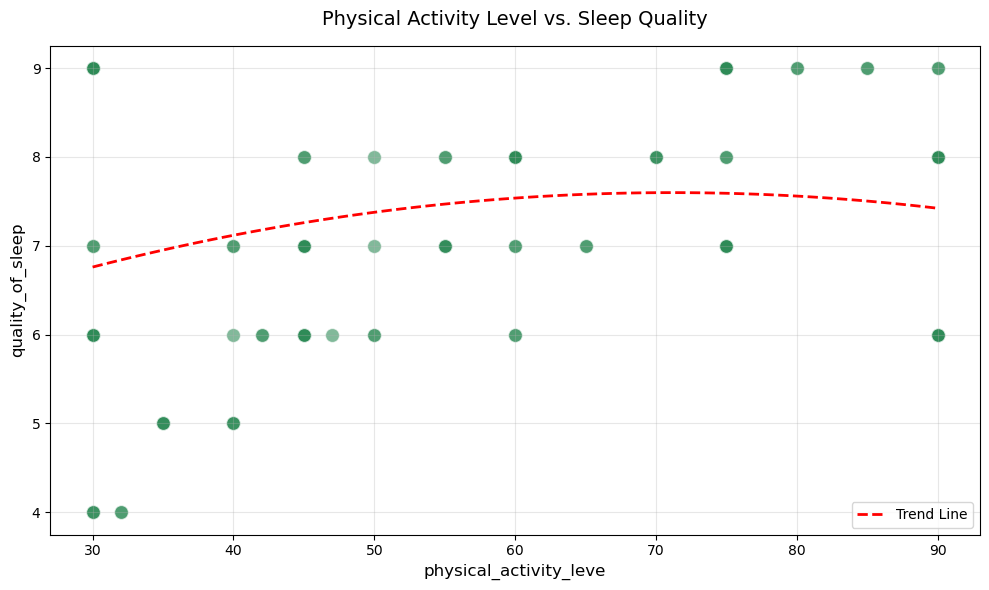

In [212]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
                x='physical_activity_level', 
                y='quality_of_sleep', 
                alpha=0.6, 
                s=100,
                color='seagreen')

z2 = np.polyfit(df['physical_activity_level'], df['quality_of_sleep'], 2)
p2 = np.poly1d(z2)
x_smooth = np.linspace(df['physical_activity_level'].min(), 
                       df['physical_activity_level'].max(), 100)
plt.plot(x_smooth, p2(x_smooth), "r--", linewidth=2, label='Trend Line')

plt.xlabel('physical_activity_leve', fontsize=12, fontweight='normal')
plt.ylabel('quality_of_sleep', fontsize=12, fontweight='normal')
plt.title('Physical Activity Level vs. Sleep Quality', 
          fontsize=14, fontweight='normal', pad=15)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('figures/physical_activity_vs_sleep_quality.png', dpi=300)
plt.show()

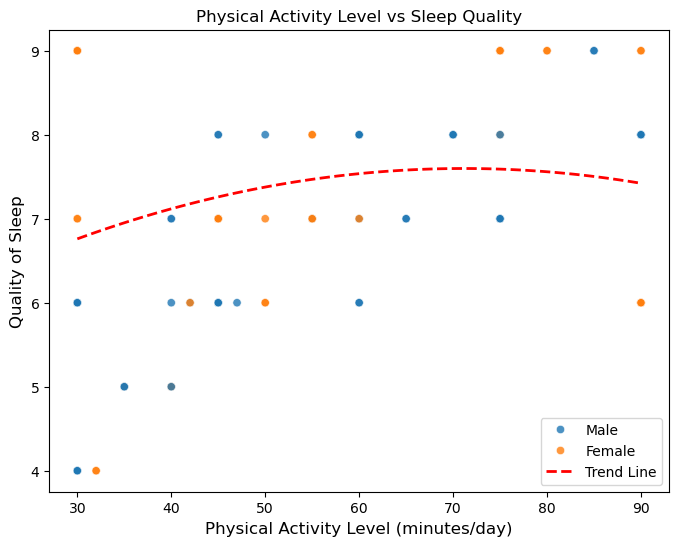

In [213]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="physical_activity_level", y="quality_of_sleep", data=df, hue="gender", alpha=0.8)
z2 = np.polyfit(df['physical_activity_level'], df['quality_of_sleep'], 2)
p2 = np.poly1d(z2)
x_smooth = np.linspace(df['physical_activity_level'].min(), 
                       df['physical_activity_level'].max(), 100)
plt.plot(x_smooth, p2(x_smooth), "r--", linewidth=2, label='Trend Line')

plt.xlabel('physical_activity_leve', fontsize=12, fontweight='normal')
plt.ylabel('quality_of_sleep', fontsize=12, fontweight='normal')
plt.title('Physical Activity Level vs. Sleep Quality', 
          fontsize=14, fontweight='normal', pad=15)
plt.legend()
plt.title("Physical Activity Level vs Sleep Quality")
plt.xlabel("Physical Activity Level (minutes/day)")
plt.ylabel("Quality of Sleep")
plt.savefig("figures/physical_activity_sleep_quality.png",dpi=300)
plt.show()

<Axes: >

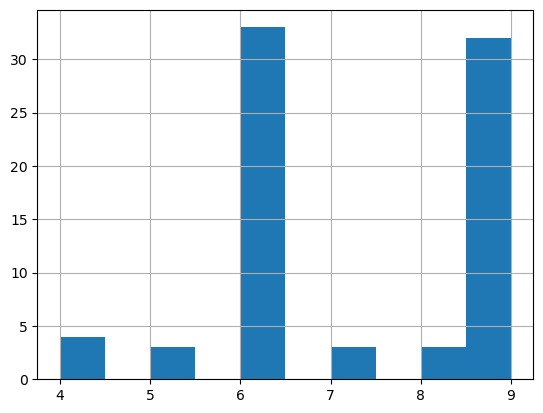

In [214]:
df.quality_of_sleep[df.sleep_disorder=="Sleep Apnea"].hist()

### Boxplot + Barplot for Sleep Disorders

/var/folders/8m/rfsmltyn01b1h7rd54xtgnvw0000gn/T/ipykernel_22016/2108479418.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sleep_disorder", y="quality_of_sleep", data=df,


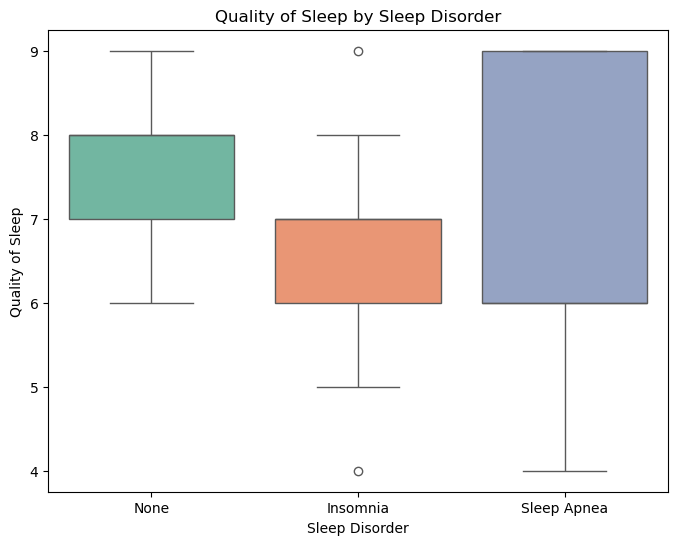

In [215]:
disorder_order = ["None", "Insomnia", "Sleep Apnea"]

# Boxplot (distribution of quality by disorder type)
plt.figure(figsize=(8,6))
sns.boxplot(x="sleep_disorder", y="quality_of_sleep", data=df,
            palette="Set2", order=disorder_order)
plt.title("Quality of Sleep by Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Quality of Sleep")
plt.savefig("figures/sleep_quality_sleep_disorder.png",dpi=300)
plt.show()

/var/folders/8m/rfsmltyn01b1h7rd54xtgnvw0000gn/T/ipykernel_22016/2766812162.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sleep_disorder", y="quality_of_sleep", data=df,


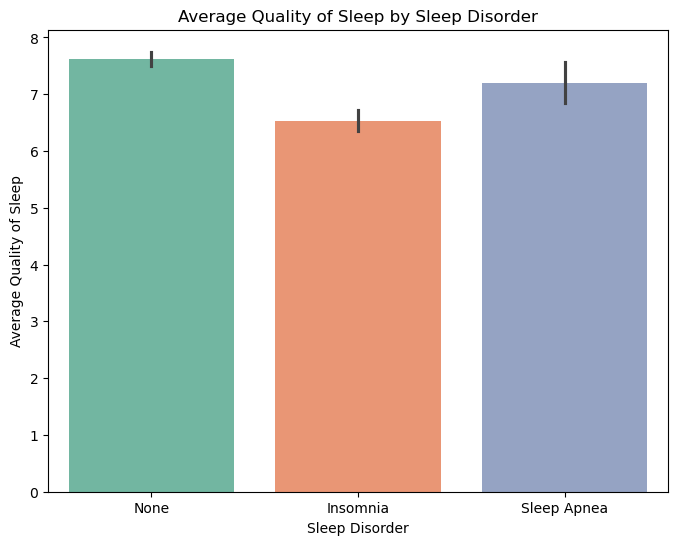

In [216]:
plt.figure(figsize=(8,6))
sns.barplot(x="sleep_disorder", y="quality_of_sleep", data=df, 
            palette="Set2", estimator="mean", order=disorder_order)
plt.title("Average Quality of Sleep by Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Average Quality of Sleep")
plt.savefig("figures/avg_sleep_quality_sleep_disorder.png",dpi=300)
plt.show()

### Scatter plot Sleep Duration vs Quality of Sleep

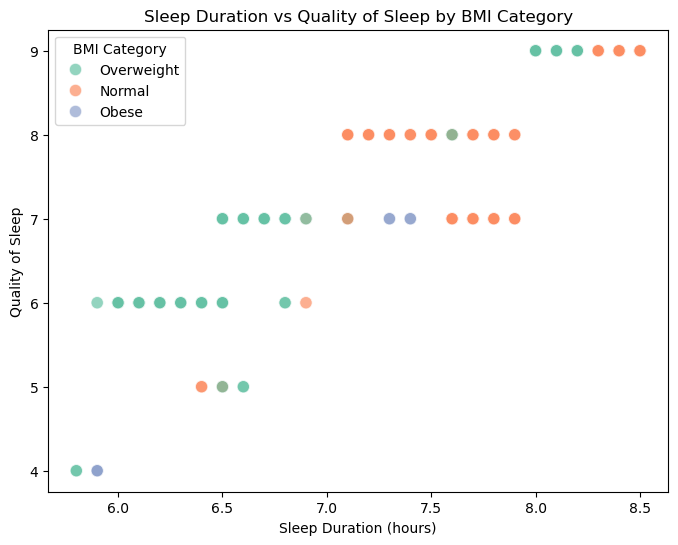

In [217]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="sleep_duration", y="quality_of_sleep", 
                hue="bmi_category", data=df, palette="Set2", s=80, alpha=0.7)

plt.title("Sleep Duration vs Quality of Sleep by BMI Category")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Quality of Sleep")
plt.legend(title="BMI Category")
plt.savefig("figures/sleep_duration_sleep_quality_bmi.png",dpi=300)
plt.show()

### Frequency of Sleep Disorders

/var/folders/8m/rfsmltyn01b1h7rd54xtgnvw0000gn/T/ipykernel_22016/2613749943.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sleep_disorder", data=df, order=disorder_order, palette="Set2")


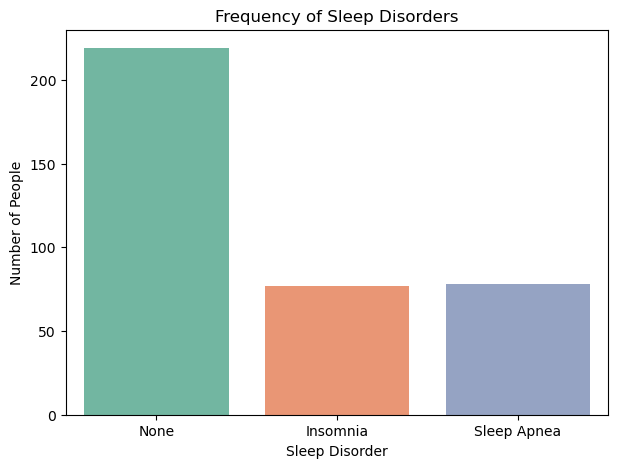

In [218]:
# Ensure logical order
disorder_order = ["None", "Insomnia", "Sleep Apnea"]

# Countplot (frequency)
plt.figure(figsize=(7,5))
sns.countplot(x="sleep_disorder", data=df, order=disorder_order, palette="Set2")

plt.title("Frequency of Sleep Disorders")
plt.xlabel("Sleep Disorder")
plt.ylabel("Number of People")
plt.savefig("figures/sleep_disorder_freq.png",dpi=300)
plt.show()

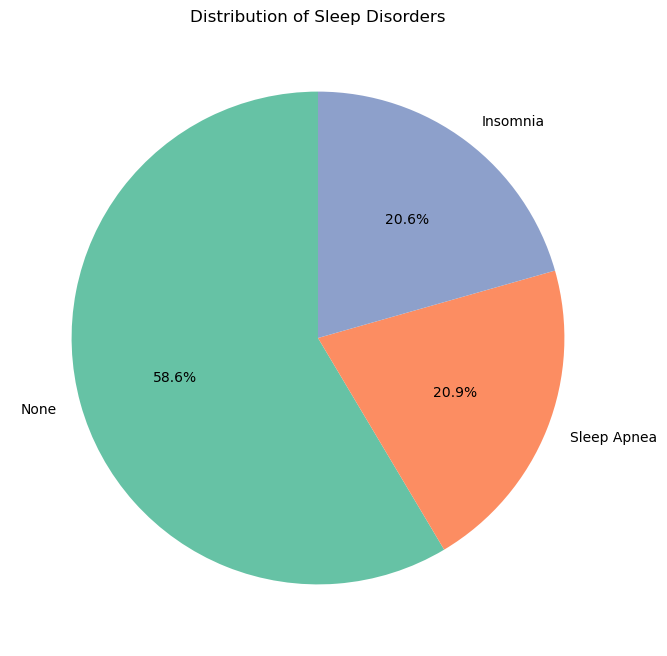

In [248]:
plt.figure(figsize=(8,8))

# Count sleep disorders
sleep_disorder_counts = df['sleep_disorder'].value_counts()

# Create pie chart
plt.pie(sleep_disorder_counts, 
        labels=sleep_disorder_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66c2a5', '#fc8d62', '#8da0cb'])

plt.title("Distribution of Sleep Disorders")
plt.savefig("figures/sleep_disorder_dis_pie.png", dpi=300, bbox_inches='tight')
plt.show()

### Boxplot – Sleep Duration by Sleep Disorder

/var/folders/8m/rfsmltyn01b1h7rd54xtgnvw0000gn/T/ipykernel_22016/686804060.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sleep_disorder", y="sleep_duration",


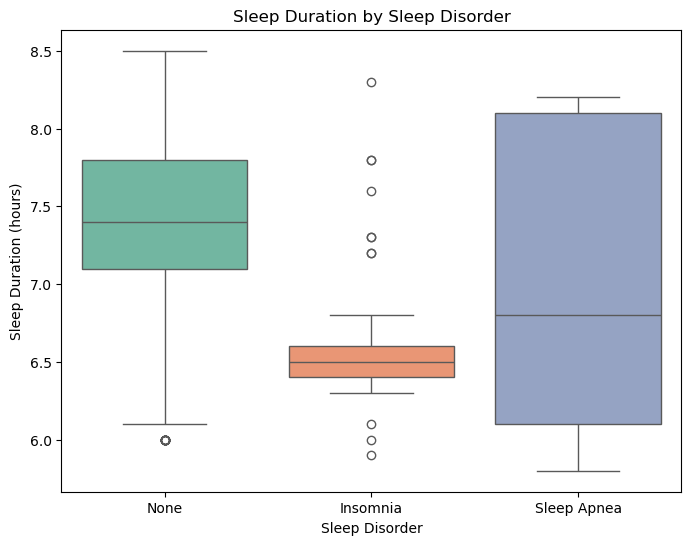

In [219]:
plt.figure(figsize=(8,6))
sns.boxplot(x="sleep_disorder", y="sleep_duration", 
            data=df, order=["None", "Insomnia", "Sleep Apnea"], 
            palette="Set2")

plt.title("Sleep Duration by Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Sleep Duration (hours)")
plt.savefig("figures/sleep_duration_sleep_disorder.png",dpi=300)
plt.show()

/var/folders/8m/rfsmltyn01b1h7rd54xtgnvw0000gn/T/ipykernel_22016/1134030219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="sleep_disorder", y="quality_of_sleep",


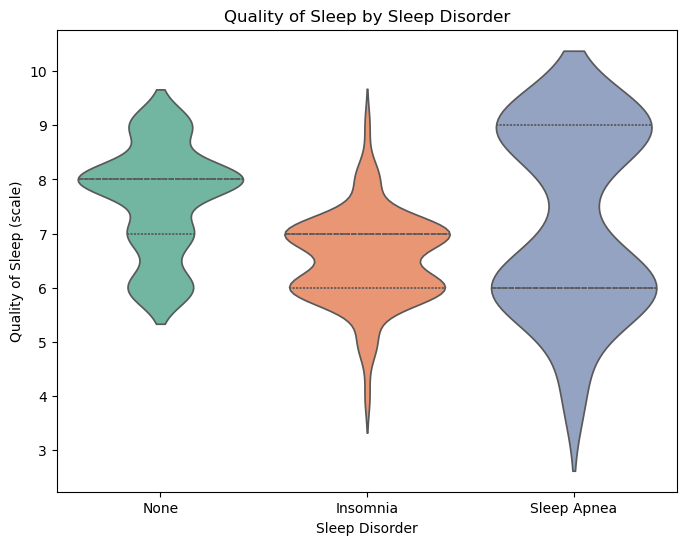

In [220]:
plt.figure(figsize=(8,6))
sns.violinplot(x="sleep_disorder", y="quality_of_sleep",
               data=df, order=["None", "Insomnia", "Sleep Apnea"], 
               palette="Set2", inner="quartile")

plt.title("Quality of Sleep by Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Quality of Sleep (scale)")
plt.savefig("figures/violinplot_sleep_qulirty_sleep_disorder.png",dpi=300)
plt.show()

### Grouped Bar Chart – Sleep Disorders by Gender

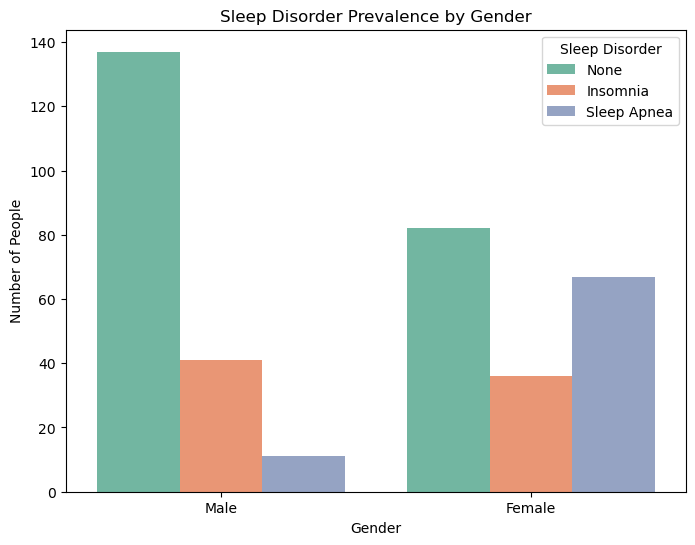

In [221]:
plt.figure(figsize=(8,6))
sns.countplot(x="gender", hue="sleep_disorder", data=df, 
              hue_order=["None", "Insomnia", "Sleep Apnea"], 
              palette="Set2")

plt.title("Sleep Disorder Prevalence by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.legend(title="Sleep Disorder")
plt.savefig("figures/sleep_disorder_prevalence_genders.png",dpi=300)
plt.show()


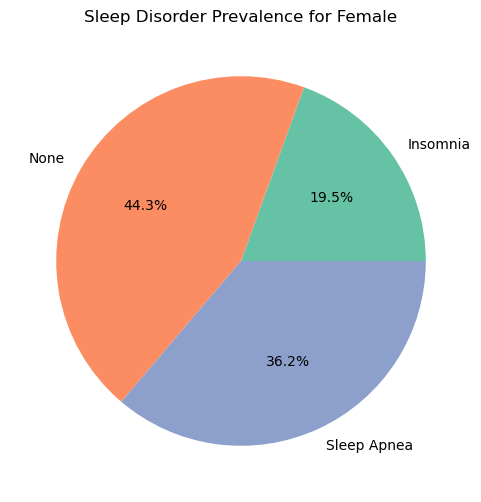

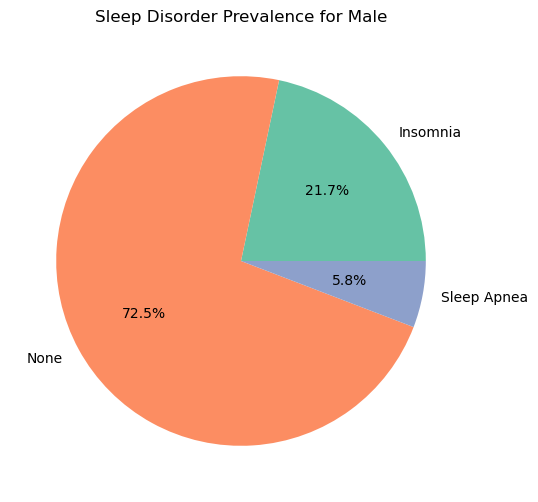

In [222]:
import matplotlib.pyplot as plt

# Count sleep disorders for each gender
gender_disorder_counts = df.groupby("gender")["sleep_disorder"].value_counts().unstack().fillna(0)

# Pie chart for each gender
for gender in gender_disorder_counts.index:
    plt.figure(figsize=(6,6))
    plt.pie(gender_disorder_counts.loc[gender], 
            labels=gender_disorder_counts.columns, 
            autopct='%1.1f%%', 
            colors=["#66c2a5", "#fc8d62", "#8da0cb"])
    plt.title(f"Sleep Disorder Prevalence for {gender}")
    plt.savefig(f"figures/piechart_sleep_disorder_prevalence_{gender}.png", dpi=300)
    plt.show()



### Sleep Disorder by Occupation

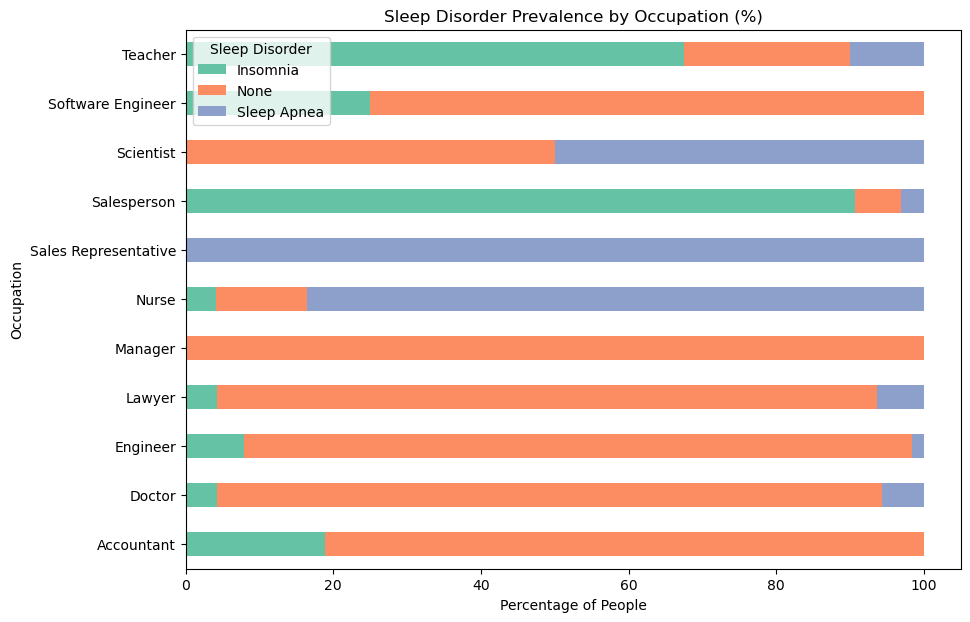

In [239]:
# Count disorders by occupation
occupation_disorders = df.groupby(["occupation", "sleep_disorder"]).size().unstack().fillna(0)

# Normalize to percentage
occupation_disorders_pct = occupation_disorders.div(occupation_disorders.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
occupation_disorders_pct.plot(kind="barh", stacked=True, figsize=(10,7), 
                              color=["#66c2a5", "#fc8d62", "#8da0cb"])

plt.title("Sleep Disorder Prevalence by Occupation (%)")
plt.xlabel("Percentage of People")
plt.ylabel("Occupation")
plt.legend(title="Sleep Disorder")
plt.savefig("figures/sleep_disorder_prevalence_occupation.png",dpi=300, bbox_inches='tight')
plt.show()

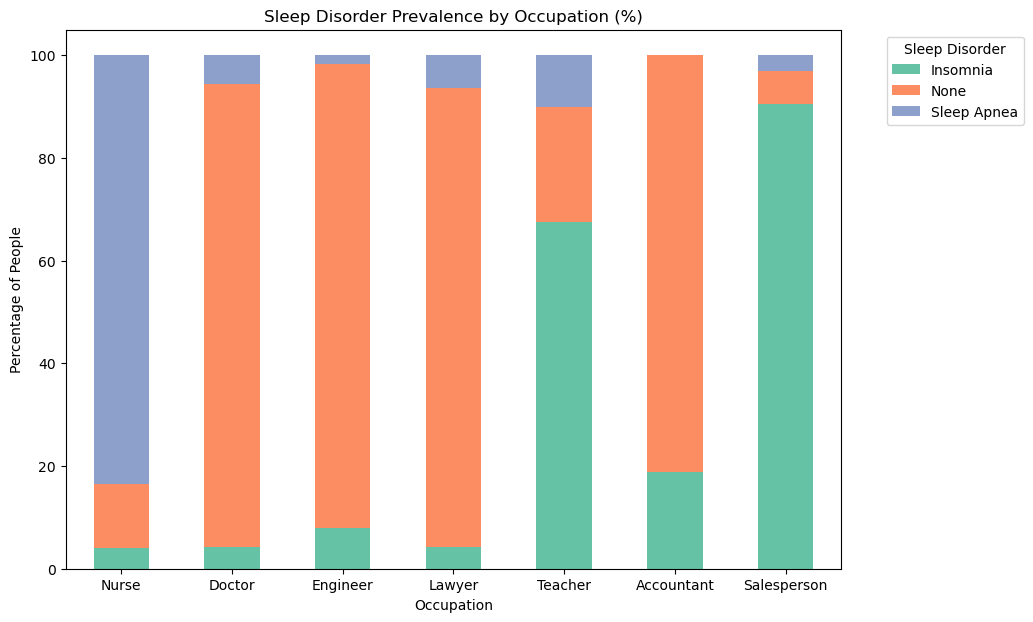

In [238]:
# Count disorders by occupation
occupation_disorders = df.groupby(["occupation", "sleep_disorder"]).size().unstack().fillna(0)

# Filter for occupations with at least 5 total data points
occupation_counts = df['occupation'].value_counts()
valid_occupations = occupation_counts[occupation_counts >= 5].index
occupation_disorders = occupation_disorders.loc[valid_occupations]

# Normalize to percentage
occupation_disorders_pct = occupation_disorders.div(occupation_disorders.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
occupation_disorders_pct.plot(kind="bar", stacked=True, figsize=(10,7),
                               color=["#66c2a5", "#fc8d62", "#8da0cb"])

plt.title("Sleep Disorder Prevalence by Occupation (%)")
plt.xlabel("Occupation")
plt.ylabel("Percentage of People")
plt.xticks(rotation=0)  # Makes occupation labels horizontal
plt.legend(title="Sleep Disorder", bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside
plt.savefig("figures/sleep_disorder_prevalence_occupation(%).png", dpi=300, bbox_inches='tight')
plt.show()

### Clustered Bar Chart – Sleep Disorders by BMI Category

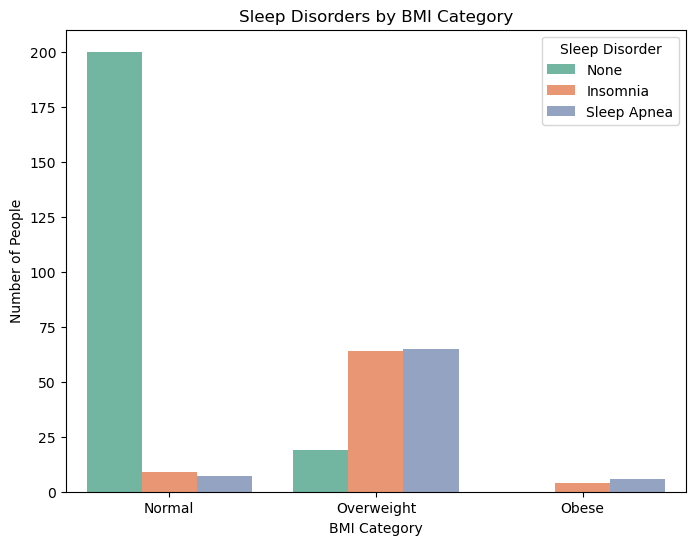

In [246]:
plt.figure(figsize=(8,6))
sns.countplot(x="bmi_category", hue="sleep_disorder", data=df,
              order=["Normal", "Overweight", "Obese"],
              hue_order=["None", "Insomnia", "Sleep Apnea"],
              palette="Set2")

plt.title("Sleep Disorders by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Number of People")
plt.legend(title="Sleep Disorder")
plt.savefig("figures/sleep_disorder_bmi.png",dpi=300)
plt.show()

### Boxplot – Stress Level by Sleep Disorder

/var/folders/8m/rfsmltyn01b1h7rd54xtgnvw0000gn/T/ipykernel_22016/1988043327.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sleep_disorder", y="stress_level",


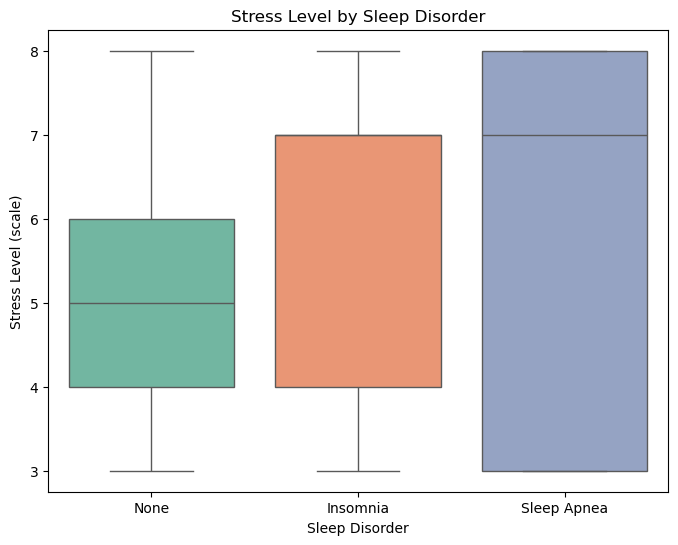

In [225]:
plt.figure(figsize=(8,6))
sns.boxplot(x="sleep_disorder", y="stress_level", 
            data=df, palette="Set2", order=["None", "Insomnia", "Sleep Apnea"])

plt.title("Stress Level by Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Stress Level (scale)")
plt.savefig("figures/boxplot_stree_level_sleep_disorder.png",dpi=300)
plt.show()


/var/folders/8m/rfsmltyn01b1h7rd54xtgnvw0000gn/T/ipykernel_22016/1648111340.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


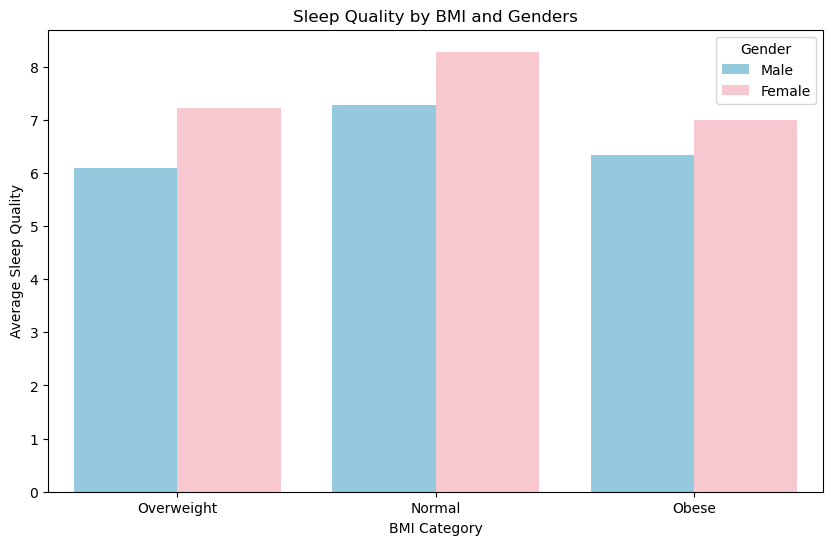

In [226]:
plt.figure(figsize=(10,6))
sns.barplot( 
    data=df,
    x='bmi_category',
    y='quality_of_sleep',
    hue='gender',
    ci=None,  # no confidence interval
    palette=["skyblue", "pink"] 
)
plt.title('Sleep Quality by BMI and Genders')
plt.ylabel('Average Sleep Quality')
plt.xlabel('BMI Category')
plt.legend(title='Gender')
plt.savefig("figures/sleep_quality_bmi_gender.png",dpi=300)
plt.show()

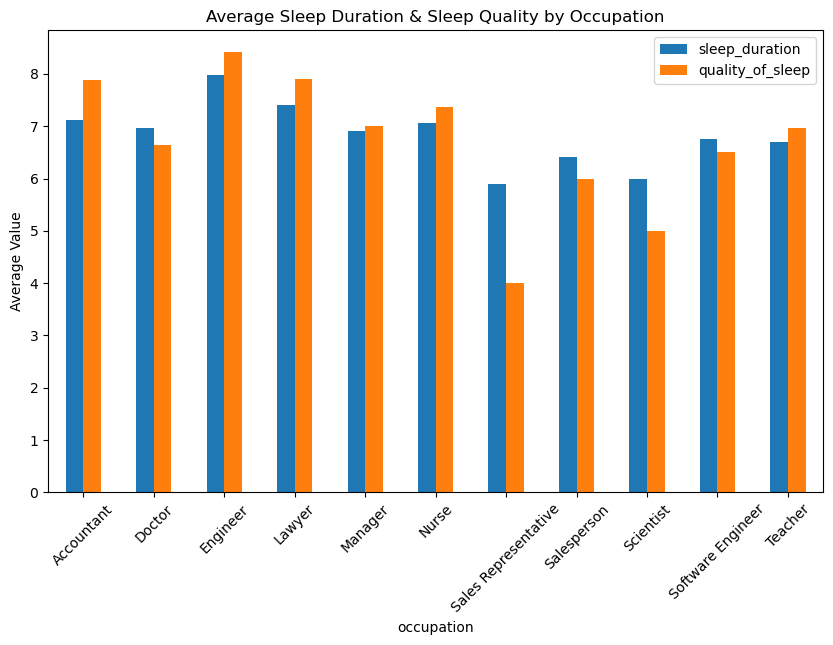

In [227]:
cols = ['occupation', 'sleep_duration', 'quality_of_sleep']
df_slice = df[cols]

# Group by occupation and calculate averages
occupation_avg = df_slice.groupby('occupation').mean().reset_index()

# Plot side-by-side bars
occupation_avg.plot(x='occupation', y=['sleep_duration', 'quality_of_sleep'], kind='bar', figsize=(10,6))
plt.ylabel('Average Value')
plt.title('Average Sleep Duration & Sleep Quality by Occupation')
plt.xticks(rotation=45)
plt.savefig("figures/avg_sleep_duration_sleep_quality_occupation.png",dpi=300, bbox_inches='tight')
plt.show()

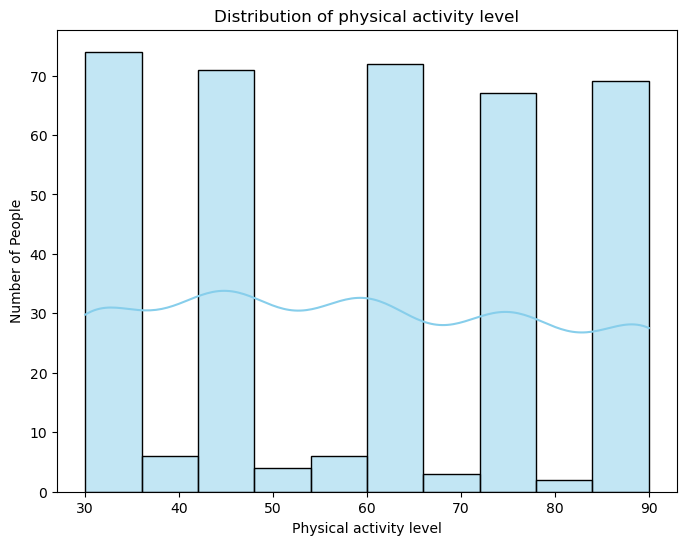

In [228]:
plt.figure(figsize=(8,6))
sns.histplot(df['physical_activity_level'], bins=10, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution of physical activity level")
plt.xlabel("Physical activity level")
plt.ylabel("Number of People")
plt.savefig("figures/physical_activity_level_dist.png",dpi=300)
plt.show()

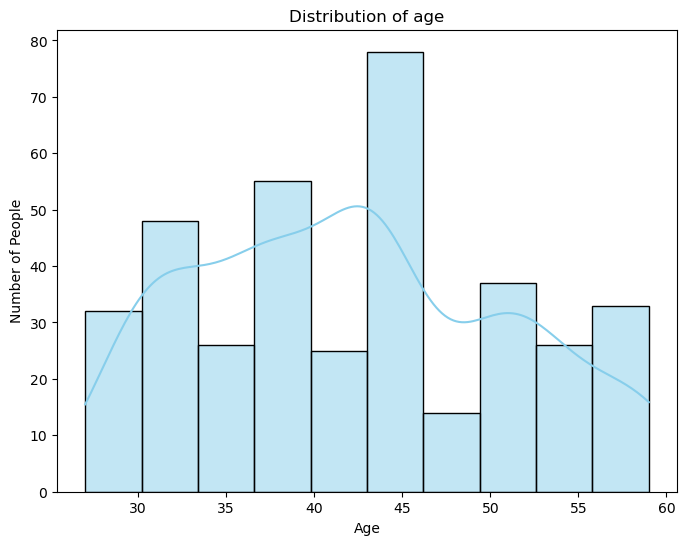

In [229]:
plt.figure(figsize=(8,6))
sns.histplot(df['age'], bins=10, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution of age")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.savefig("figures/age_dist.png",dpi=300)
plt.show()

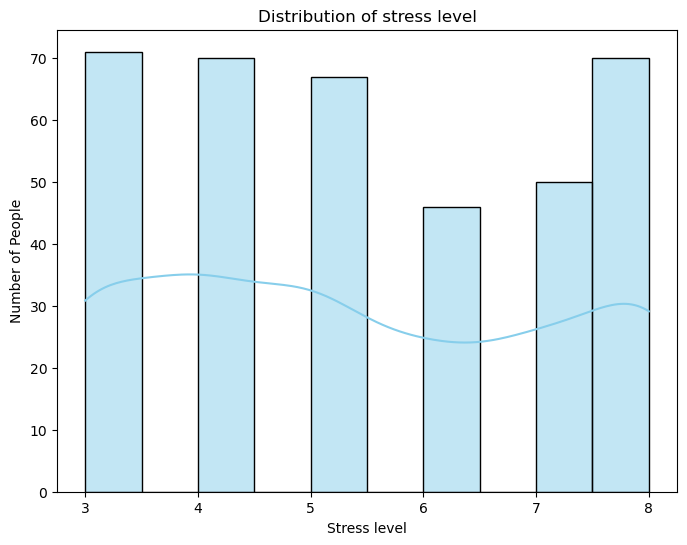

In [230]:
plt.figure(figsize=(8,6))
sns.histplot(df['stress_level'], bins=10, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution of stress level")
plt.xlabel("Stress level")
plt.ylabel("Number of People")
plt.savefig("figures/stress_level_dist.png",dpi=300)
plt.show()

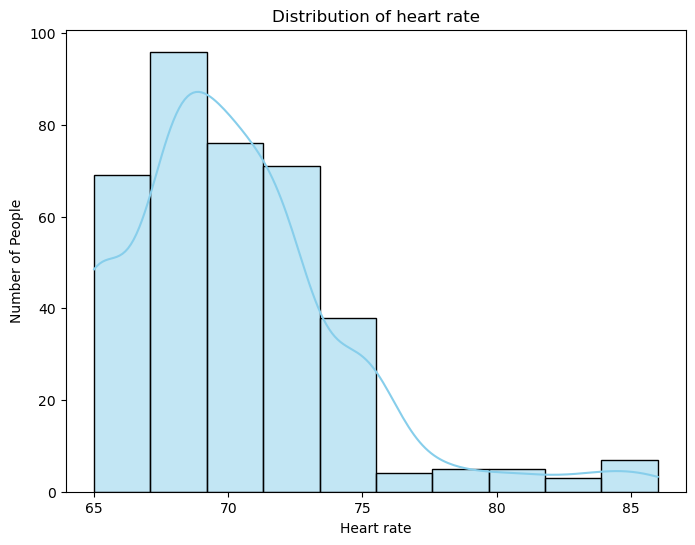

In [231]:
plt.figure(figsize=(8,6))
sns.histplot(df['heart_rate'], bins=10, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution of heart rate")
plt.xlabel("Heart rate")
plt.ylabel("Number of People")
plt.savefig("figures/heart_rate_dist.png",dpi=300)
plt.show()

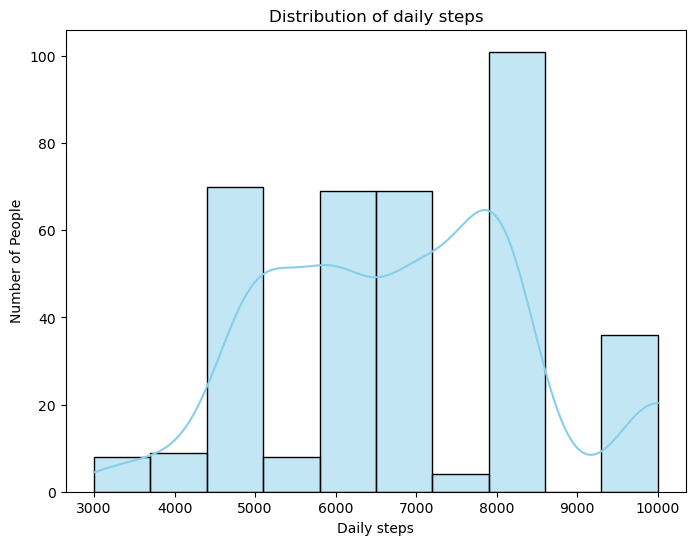

In [232]:
plt.figure(figsize=(8,6))
sns.histplot(df['daily_steps'], bins=10, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution of daily steps")
plt.xlabel("Daily steps")
plt.ylabel("Number of People")
plt.savefig("test.png",dpi=300)
plt.savefig("figures/daily_stpes_dist.png",dpi=300)
plt.show()